In [1]:
import tensorflow as tf  
import numpy as np  
import cv2  
import matplotlib.image as mpimg  
import matplotlib.pyplot as plt  
  
img_size = 128  # This needs to be consistent with your model training  
  
def preprocess_image(image_path):  
    """Load an image, resize it, and normalize it."""  
    image = mpimg.imread(image_path)  
    image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR) if image.shape[-1] == 4 else image  
    image = cv2.resize(image, (img_size, img_size))  
    image = image / 255.0  
    return np.array([image])  
  
def predict_image_status(saved_model_loaded, image_path, threshold=0.07):  
    preprocessed_image = preprocess_image(image_path)  
      
    # Use the model  
    infer = saved_model_loaded.signatures["serving_default"]
    reconstructed_image = infer(tf.constant(preprocessed_image, dtype=tf.float32))['sequential_1']
    print("AA", reconstructed_image.shape)  
    reconstructed_image_np = reconstructed_image.numpy()  
    reconstruction_error = np.mean(np.abs(preprocessed_image - reconstructed_image_np))  
    # print("Detail", reconstructed_image)
    # print("Detail numpy", reconstructed_image)
      
    is_anomaly = reconstruction_error > threshold  
    status = 'Anomaly' if is_anomaly else 'Good'  
      
    print(f"Status: {status}, Reconstruction Error: {reconstruction_error}")  
    # Removing the batch dimension for display  
    original_np = np.squeeze(preprocessed_image, axis=0)  
    reconstructed_np = np.squeeze(reconstructed_image_np, axis=0)  
    print("Reconstructed np", reconstructed_np.shape, reconstructed_np)
    
    display_images(original_np, reconstructed_np)  
      
def display_images(original, reconstructed):  
    """Display original, reconstructed images, and their difference."""  
    plt.figure(figsize=(18, 6))  
  
    # Original  
    plt.subplot(1, 3, 1)  
    plt.title('Original Image')  
    plt.imshow(original)  
    plt.axis('off')  
  
    # Reconstructed  
    plt.subplot(1, 3, 2)  
    plt.title('Reconstructed Image')  
    plt.imshow(reconstructed)  
    plt.axis('off')  
  
    # Difference  
    plt.subplot(1, 3, 3)  
    plt.title('Difference')  
    difference = np.abs(original - reconstructed)  
    plt.imshow(difference, cmap='gray')  
    plt.axis('off')  
  
    plt.show()  
  

In [2]:
# Load the saved model  
model_save_path = "output/saved_model"  
saved_model_loaded = tf.saved_model.load(model_save_path)  
  

In [3]:
serving_default = saved_model_loaded.signatures['serving_default']  
# You can now access the inputs and outputs of the model via the serving_default signature.  
print("Inputs: ", serving_default.inputs)  
print("Outputs: ", serving_default.outputs)  

# Understanding signature inputs and outputs  
struct_inputs = serving_default.structured_input_signature  
struct_outputs = serving_default.structured_outputs  
  
print("=== Model Inputs ===")  
# struct_inputs[1] contains the actual input details as a dictionary  
for input_name, input_spec in struct_inputs[1].items():  
    print(f"Input name: {input_name}, spec: {input_spec}")  
  
print("\n=== Model Outputs ===")  
# struct_outputs is a dictionary of outputs  
for output_name, output_spec in struct_outputs.items():  
    print(f"Output name: {output_name}, spec: {output_spec}")  

Inputs:  [<tf.Tensor 'sequential_input:0' shape=(None, 128, 128, 3) dtype=float32>, <tf.Tensor 'unknown:0' shape=() dtype=resource>, <tf.Tensor 'unknown_0:0' shape=() dtype=resource>, <tf.Tensor 'unknown_1:0' shape=() dtype=resource>, <tf.Tensor 'unknown_2:0' shape=() dtype=resource>, <tf.Tensor 'unknown_3:0' shape=() dtype=resource>, <tf.Tensor 'unknown_4:0' shape=() dtype=resource>, <tf.Tensor 'unknown_5:0' shape=() dtype=resource>, <tf.Tensor 'unknown_6:0' shape=() dtype=resource>, <tf.Tensor 'unknown_7:0' shape=() dtype=resource>, <tf.Tensor 'unknown_8:0' shape=() dtype=resource>, <tf.Tensor 'unknown_9:0' shape=() dtype=resource>, <tf.Tensor 'unknown_10:0' shape=() dtype=resource>, <tf.Tensor 'unknown_11:0' shape=() dtype=resource>, <tf.Tensor 'unknown_12:0' shape=() dtype=resource>, <tf.Tensor 'unknown_13:0' shape=() dtype=resource>, <tf.Tensor 'unknown_14:0' shape=() dtype=resource>, <tf.Tensor 'unknown_15:0' shape=() dtype=resource>, <tf.Tensor 'unknown_16:0' shape=() dtype=reso

AA (1, 128, 128, 3)
Status: Anomaly, Reconstruction Error: 0.07542719308281177
Reconstructed np (128, 128, 3) [[[0.5110366  0.4815851  0.43726698]
  [0.5166856  0.46551928 0.41054   ]
  [0.52531356 0.46800962 0.39758238]
  ...
  [0.52696794 0.4531368  0.28197557]
  [0.53438425 0.4589381  0.28523755]
  [0.53464484 0.48698744 0.35131633]]

 [[0.51671106 0.47691166 0.4254369 ]
  [0.523712   0.4593416  0.3923276 ]
  [0.5261187  0.45930126 0.37913695]
  ...
  [0.5396147  0.43958503 0.22120728]
  [0.5390549  0.44430557 0.24675876]
  [0.5215545  0.47655347 0.31934148]]

 [[0.51985604 0.47280738 0.42501014]
  [0.5199144  0.45073792 0.39000398]
  [0.5262496  0.45440385 0.3733038 ]
  ...
  [0.5331184  0.42285126 0.20643134]
  [0.5333956  0.42445603 0.22763328]
  [0.5424749  0.49354765 0.27720413]]

 ...

 [[0.5525309  0.46391246 0.3890556 ]
  [0.56445473 0.44186553 0.3300264 ]
  [0.54923844 0.42876542 0.30352136]
  ...
  [0.7206979  0.6385443  0.58665866]
  [0.7342249  0.65244037 0.58386016]
  [

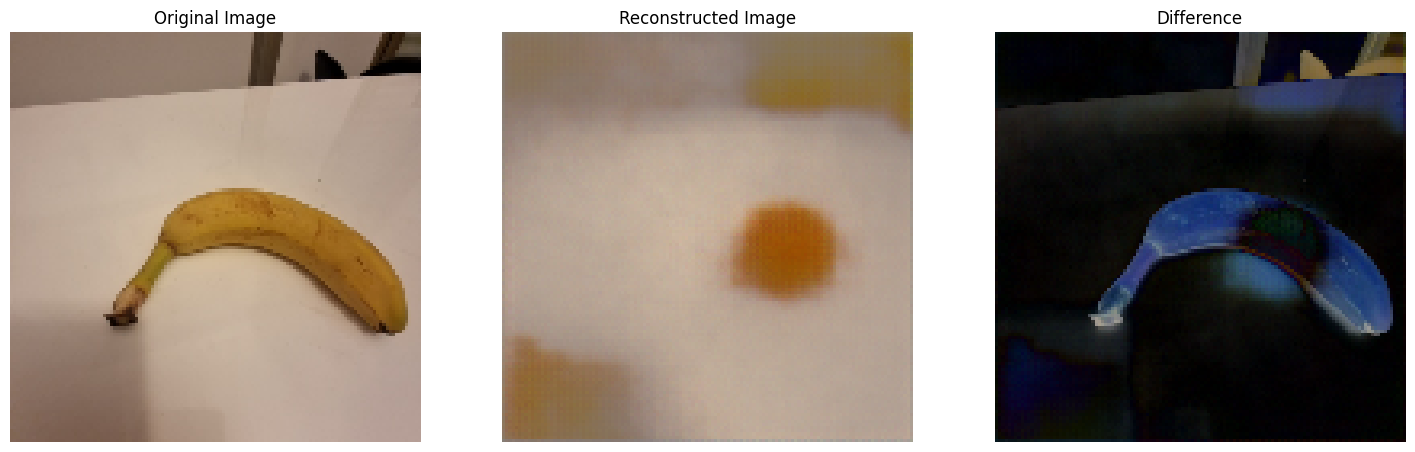

AA (1, 128, 128, 3)
Status: Good, Reconstruction Error: 0.04074147884948887
Reconstructed np (128, 128, 3) [[[0.5117007  0.4815742  0.4379567 ]
  [0.51680946 0.4649696  0.4108368 ]
  [0.5254734  0.46916914 0.39945388]
  ...
  [0.5249114  0.4582102  0.3190107 ]
  [0.53260136 0.4618415  0.31970686]
  [0.5298259  0.4850192  0.37382463]]

 [[0.5180611  0.47734216 0.42658353]
  [0.5251215  0.4597072  0.39622846]
  [0.527809   0.4572296  0.3838488 ]
  ...
  [0.5348871  0.4430382  0.26740333]
  [0.53423053 0.44918084 0.28478402]
  [0.5189433  0.47437286 0.34704587]]

 [[0.5207384  0.4738494  0.4257624 ]
  [0.52375716 0.45157692 0.39263862]
  [0.53001726 0.45623568 0.37780508]
  ...
  [0.5296584  0.43216515 0.25456873]
  [0.53019834 0.43292767 0.2684632 ]
  [0.53746027 0.48983136 0.31101394]]

 ...

 [[0.5842028  0.5130452  0.4384654 ]
  [0.61480874 0.5024742  0.4116964 ]
  [0.5916662  0.48762333 0.38171336]
  ...
  [0.7662484  0.68421406 0.6169493 ]
  [0.782517   0.69260836 0.6259833 ]
  [0.7

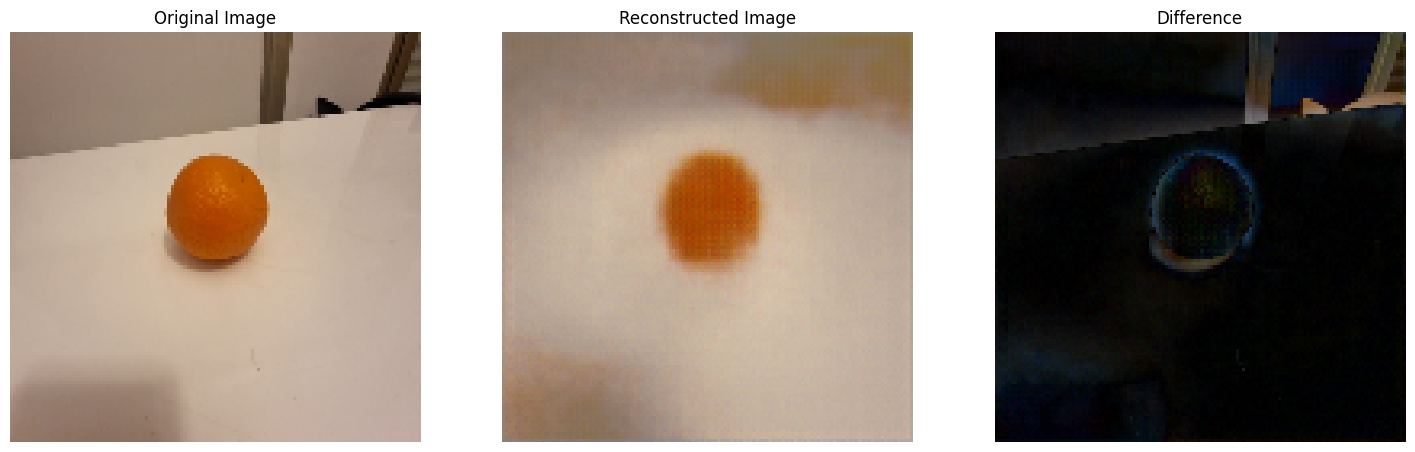

In [4]:
# You would replace "optimal_threshold" with the actual threshold value you determined to be optimal.  
optimal_threshold = 0.07  # This is an example value; adjust it based on your specific use case  
  
# Example usages:  
predict_image_status(saved_model_loaded, "test/banana.4piv5bho.ingestion-d59dc547b-j6mhk.jpg", threshold=optimal_threshold)  
predict_image_status(saved_model_loaded, "test/orange.4piv9lmk.ingestion-d59dc547b-94nn2.jpg", threshold=optimal_threshold)  

AA (1, 128, 128, 3)
Status: Anomaly, Reconstruction Error: 0.16210838470846986
Reconstructed np (128, 128, 3) [[[0.5112407  0.4819633  0.4424517 ]
  [0.5156197  0.46681836 0.41952768]
  [0.5250719  0.47121358 0.41157505]
  ...
  [0.5201307  0.46292883 0.3900451 ]
  [0.5255773  0.47278103 0.3948402 ]
  [0.520006   0.48061907 0.4245879 ]]

 [[0.5168091  0.47895598 0.4330354 ]
  [0.52405035 0.46149686 0.40694442]
  [0.5261647  0.46100935 0.39791468]
  ...
  [0.5234438  0.45124432 0.37091574]
  [0.5268917  0.45945966 0.38030532]
  [0.51436454 0.47287035 0.41552022]]

 [[0.5197399  0.4758186  0.43173692]
  [0.52205545 0.45497584 0.40193412]
  [0.5279041  0.4596963  0.39157254]
  ...
  [0.5272439  0.44907305 0.36121112]
  [0.52804047 0.45784196 0.37190384]
  [0.52403766 0.47751316 0.40172255]]

 ...

 [[0.59871775 0.55263597 0.50143075]
  [0.6411755  0.5659705  0.5106353 ]
  [0.62638485 0.56811243 0.50412226]
  ...
  [0.6927648  0.61357206 0.569111  ]
  [0.7059486  0.6277632  0.568201  ]
  [

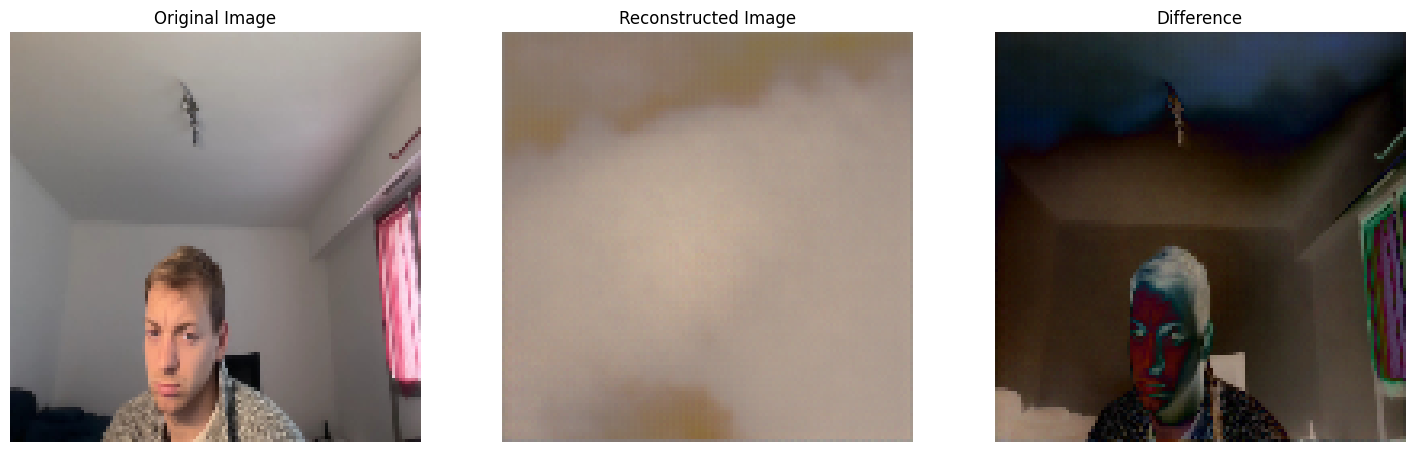

In [5]:
predict_image_status(saved_model_loaded, "test.jpg", threshold=optimal_threshold)  

AA (1, 128, 128, 3)
Status: Anomaly, Reconstruction Error: 0.16187443668181586
Reconstructed np (128, 128, 3) [[[0.5112668  0.48191977 0.44246897]
  [0.51562774 0.46681708 0.4195777 ]
  [0.525087   0.4712847  0.41176394]
  ...
  [0.5203359  0.4627452  0.38488138]
  [0.5257986  0.47224316 0.39015543]
  [0.52050215 0.48109868 0.42187247]]

 [[0.51685137 0.4789823  0.4331341 ]
  [0.5240867  0.4615484  0.40723267]
  [0.526332   0.46106428 0.39825776]
  ...
  [0.52371895 0.45075002 0.36340725]
  [0.52704245 0.45932052 0.37442225]
  [0.5145072  0.47290525 0.4115472 ]]

 [[0.5198042  0.47589442 0.4317692 ]
  [0.52222717 0.45493576 0.40215075]
  [0.52816814 0.45986155 0.39181602]
  ...
  [0.52728516 0.448242   0.35275358]
  [0.52763945 0.45670852 0.3652464 ]
  [0.5247081  0.47846562 0.39607525]]

 ...

 [[0.6002002  0.55375296 0.50211966]
  [0.6429912  0.5676924  0.51139736]
  [0.6277444  0.56950897 0.5045769 ]
  ...
  [0.6956727  0.61598814 0.57061046]
  [0.70891476 0.6301702  0.5703477 ]
  [

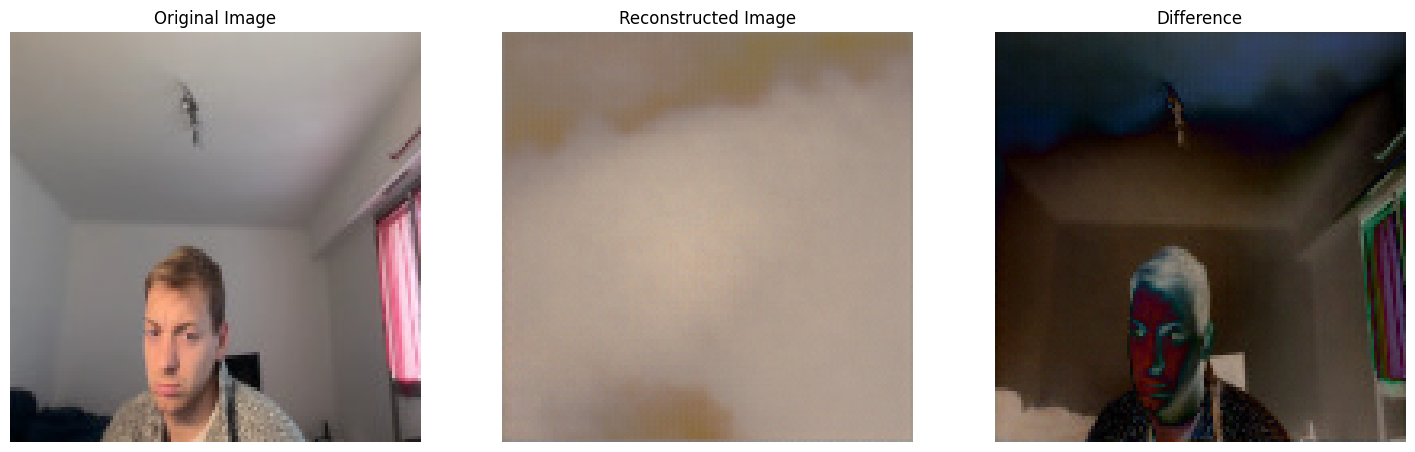

In [6]:
predict_image_status(saved_model_loaded, "test-scale.jpg", threshold=optimal_threshold)  